In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data = pd.read_csv("xy_data.csv")
x_obs, y_obs = data.iloc[:, 0].values, data.iloc[:, 1].values
t = np.linspace(6, 60, len(x_obs))

In [4]:
def model(params, t):
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)
    exp_term = np.exp(M * np.abs(t))
    x_pred = t*np.cos(theta) - exp_term*np.sin(0.3*t)*np.sin(theta) + X
    y_pred = 42 + t*np.sin(theta) + exp_term*np.sin(0.3*t)*np.cos(theta)
    return x_pred, y_pred

In [5]:
def objective(params):
    x_pred, y_pred = model(params, t)
    return np.mean(np.sqrt((x_obs - x_pred)**2 + (y_obs - y_pred)**2))

In [6]:
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]
res = minimize(objective, [25, 0, 50], bounds=bounds, method='L-BFGS-B')
theta, M, X = res.x

print(f"Theta = {theta:.6f}°, M = {M:.6f}, X = {X:.6f}")

Theta = 30.044089°, M = -0.005280, X = 55.347336


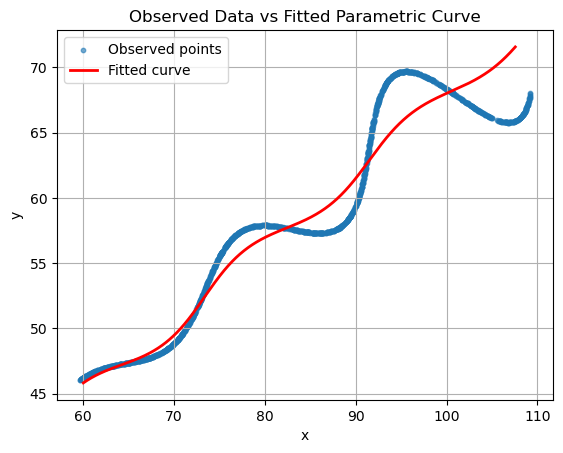

In [7]:
x_fit, y_fit = model(res.x, t)
plt.scatter(x_obs, y_obs, s=10, alpha=0.6, label='Observed points')
plt.plot(x_fit, y_fit, 'r', lw=2, label='Fitted curve')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.title('Observed Data vs Fitted Parametric Curve')
plt.show()